In [6]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.insert(0, src_dir)

from clean.dataset_clean import DataSetClean

In [7]:
clean_utils = DataSetClean()

In [8]:
data_frame_of_variables

,co2_eq_emissions,source,training_type,geographical_location,environment,downloads,likes,domain,size,size_efficency,auto
0,149200.000000,AutoTrain,pretraining,East US,8 v100 16GB,1172830,170,NLP,3.528337e+08,2.364837e+03,False
1,133.021988,AutoTrain,Not Specified,Not Specified,Not Specified,14,0,NLP,3.081921e+08,2.316851e+06,True
2,126.344463,AutoTrain,Not Specified,Not Specified,Not Specified,14,1,NLP,3.083194e+08,2.440308e+06,True
3,7.989145,AutoTrain,Not Specified,Not Specified,Not Specified,45,0,NLP,4.380438e+08,5.482988e+07,True
4,55.101963,AutoTrain,Not Specified,Not Specified,Not Specified,43,0,NLP,4.333314e+08,7.864173e+06,True
...,...,...,...,...,...,...,...,...,...,...,...
1414,0.401257,AutoTrain,Not Specified,Not Specified,Not Specified,0,0,NLP,1.336520e+09,3.330836e+09,True
1415,0.015786,AutoTrain,Not Specified,Not Specified,Not Specified,0,0,NLP,3.100225e+08,1.963898e+10,True
1416,3.673900,AutoTrain,Not Specified,Not Specified,Not Specified,0,0,NLP,3.100225e+08,8.438513e+07,True
1417,5.741513,AutoTrain,Not Specified,Not Specified,Not Specified,0,0,NLP,3.100225e+08,5.399666e+07,True


In [15]:
def plot_categorical_variable(categorical_variable, title, xlable, ylabel):
    names = data_frame_of_variables[categorical_variable].value_counts()/size_of_dataframe
    plot_indexes = names.index
    plot_values = names.values
    plt.figure(figsize=(8, 4))
    plt.bar(plot_indexes,plot_values,label="Bars 1",color="gray")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    plt.show()

# pasar esta función a los archivos de src

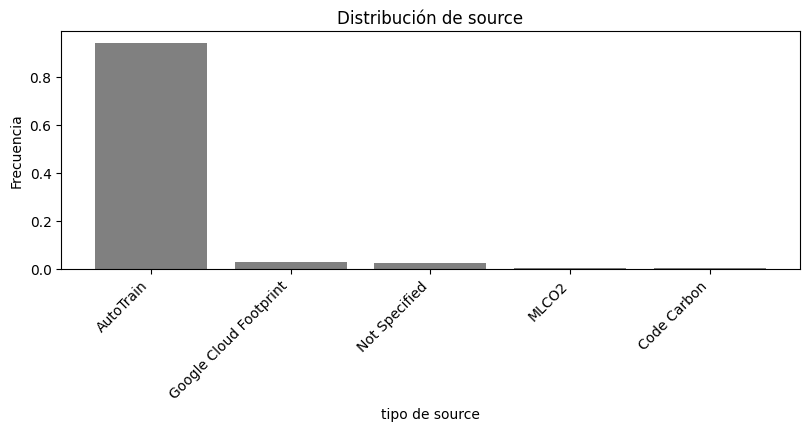

source
AutoTrain                 0.943622
Google Cloud Footprint    0.028189
Not Specified             0.021142
MLCO2                     0.003524
Code Carbon               0.003524
Name: count, dtype: float64

In [16]:
plot_categorical_variable('source', 'Distribución de source', 'tipo de source','Frecuencia')
data_frame_of_variables['source'].value_counts()/size_of_dataframe

In [17]:

data_frame_of_variables = clean_utils.read_file('../assets/HFCO2.csv')
data_frame_of_variables
size_of_dataframe = len(data_frame_of_variables)

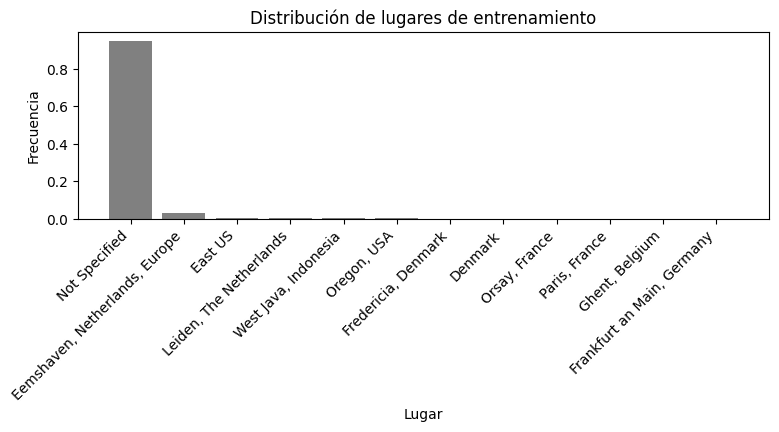

geographical_location
Not Specified                     0.947146
Eemshaven, Netherlands, Europe    0.031712
East US                           0.004228
Leiden, The Netherlands           0.004228
West Java, Indonesia              0.003524
Oregon, USA                       0.002819
Fredericia, Denmark               0.002114
Denmark                           0.001409
Orsay, France                     0.000705
Paris, France                     0.000705
Ghent, Belgium                    0.000705
Frankfurt an Main, Germany        0.000705
Name: count, dtype: float64

In [19]:
plot_categorical_variable('geographical_location', 'Distribución de lugares de entrenamiento', 'Lugar','Frecuencia')
data_frame_of_variables['geographical_location'].value_counts()/size_of_dataframe

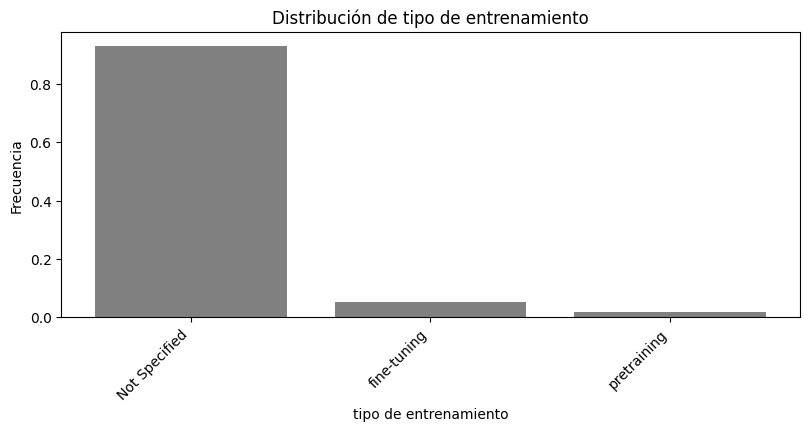

training_type
Not Specified    0.930233
fine-tuning      0.052149
pretraining      0.017618
Name: count, dtype: float64

In [20]:
plot_categorical_variable('training_type', 'Distribución de tipo de entrenamiento', 'tipo de entrenamiento','Frecuencia')
data_frame_of_variables['training_type'].value_counts()/size_of_dataframe

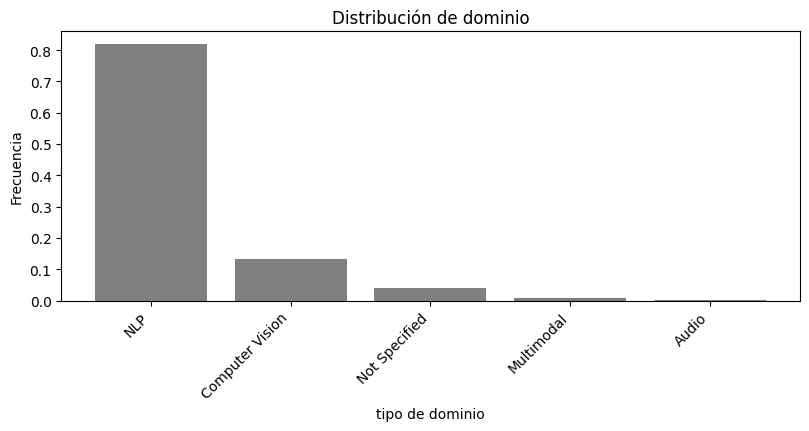

domain
NLP                0.818887
Computer Vision    0.132488
Not Specified      0.040169
Multimodal         0.007752
Audio              0.000705
Name: count, dtype: float64

In [22]:
plot_categorical_variable('domain', 'Distribución de dominio', 'tipo de dominio','Frecuencia')
data_frame_of_variables['domain'].value_counts()/size_of_dataframe

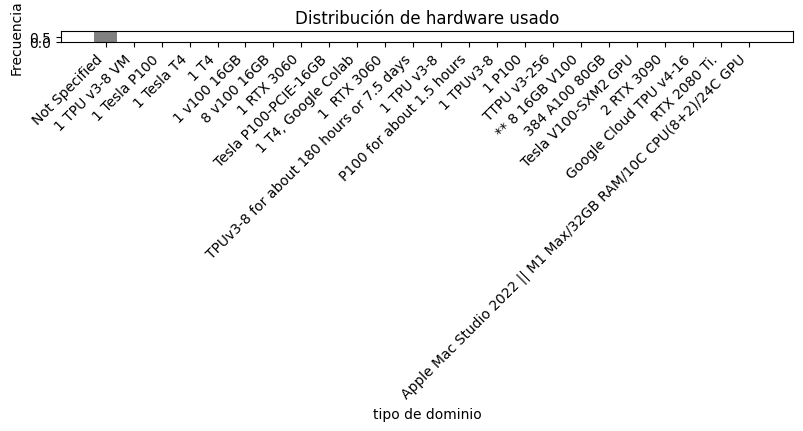

environment
Not Specified                                                    0.940099
1 TPU v3-8 VM                                                    0.031712
1 Tesla P100                                                     0.003524
1 Tesla T4                                                       0.003524
1 T4                                                             0.002819
1 v100 16GB                                                      0.002114
8 v100 16GB                                                      0.001409
1 RTX 3060                                                       0.001409
Tesla P100-PCIE-16GB                                             0.001409
1 T4, Google Colab                                               0.001409
1  RTX 3060                                                      0.001409
TPUv3-8 for about 180 hours or 7.5 days                          0.000705
1 TPU v3-8                                                       0.000705
P100 for about 1.5 hours  

In [23]:
plot_categorical_variable('environment', 'Distribución de hardware usado', 'tipo de dominio','Frecuencia')
data_frame_of_variables['environment'].value_counts()/size_of_dataframe

In [26]:
size_of_dataframe = len(data_frame_of_variables)
data_frame_of_variables.isnull().sum()/size_of_dataframe
#porcentaje de valores nulos

co2_eq_emissions         0.000000
source                   0.000000
training_type            0.000000
geographical_location    0.000000
environment              0.000000
downloads                0.000000
likes                    0.000000
domain                   0.000000
size                     0.079634
size_efficency           0.079634
auto                     0.000000
dtype: float64

plot_values

In [29]:
autotune_distribution= data_frame_of_variables['auto'].value_counts()
autotune_distribution/size_of_dataframe

auto
True     0.909796
False    0.085976
1        0.004228
Name: count, dtype: float64

In [14]:
df_numerico = data_frame_of_variables.select_dtypes(include=np.number)
proporcion_infinitos = (np.isinf(df_numerico).sum() / len(df_numerico)) * 100
proporcion_infinitos

co2_eq_emissions    0.000000
downloads           0.000000
likes               0.000000
size                0.000000
size_efficency      0.070472
dtype: float64